In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

TensorFlow 2.x selected.


In [ ]:
class_map = { 
  10: 1, #A
  11: 2, #B
  12: 3, #C
  33: 4, #X
  23: 5, #N
  25: 0, #P
}
print(class_map)

{10: 1, 11: 2, 12: 3, 33: 4, 23: 5, 25: 0}


In [ ]:
reverse_class_map = {v: k for k, v in class_map.items()}
print(reverse_class_map)

{1: 10, 2: 11, 3: 12, 4: 33, 5: 23, 0: 25}


In [ ]:
def tf_map_classes(label, class_map, otherwise_value=0):
  cases = []
  for original, new_class in class_map.items():
    case = (
      tf.math.equal(
          label,
          tf.constant(original, dtype=tf.int64)),
      lambda : 
        tf.constant(new_class, dtype=tf.int64)
    )
    cases.append(case)
  return tf.case(
    cases,
    default=lambda: tf.constant(otherwise_value, tf.int64),
    exclusive=True)

In [ ]:
def prepare_emnist(example):
  prepared_batch = example['image']
  prepared_batch = tf.dtypes.cast(prepared_batch, tf.float32)
  prepared_batch = prepared_batch / 255

  prepared_label = tf_map_classes(example['label'], class_map)
  prepared_label = tf.one_hot(prepared_label, len(class_map))
  return prepared_batch, prepared_label

In [ ]:
def filter_label_eq_num(num): 
  return lambda x : tf.math.equal(
      x['label'],
      tf.constant(num, dtype=tf.int64))

In [ ]:
train = tfds.load(name="emnist/bymerge", split=tfds.Split.TRAIN).map(map_func=prepare_emnist)

<class 'dict'>
{10: 1, 11: 2, 12: 3, 33: 4, 23: 5, 25: 0}


In [ ]:
test_map_func = tfds.as_numpy(train.batch(64)).__next__()
print(test_map_func[0].shape)

(64, 28, 28, 1)


In [ ]:
train = tfds.load(name="emnist/bymerge", split=tfds.Split.TRAIN)
test = tfds.load(name="emnist/bymerge", split=tfds.Split.TEST)

In [ ]:
num_per_class = 3000

a_dataset = train.filter(filter_label_eq_num(10)).take(num_per_class)
b_dataset = train.filter(filter_label_eq_num(11)).take(num_per_class)
c_dataset = train.filter(filter_label_eq_num(12)).take(num_per_class)
x_dataset = train.filter(filter_label_eq_num(33)).take(num_per_class)
n_dataset = train.filter(filter_label_eq_num(23)).take(num_per_class)
p_dataset = train.filter(filter_label_eq_num(25)).take(num_per_class)
#rest_dataset = train.filter(rest_filter()).shuffle(30000).take(num_per_class)


train = a_dataset
train = train.concatenate(b_dataset)
train = train.concatenate(c_dataset)
train = train.concatenate(x_dataset)
train = train.concatenate(n_dataset)
train = train.concatenate(p_dataset)
#train = train.concatenate(rest_dataset)
#train = train.shuffle(num_per_class * 7)
train = train.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
val_num_per_class = 1000
  
def rest_filter():
  return lambda x : tf.math.equal(
      tf.case([
        (filter_eq_num(10)(x), tf_const(1)),
        (filter_eq_num(11)(x), tf_const(2)),
        (filter_eq_num(12)(x), tf_const(3)),
        (filter_eq_num(33)(x), tf_const(4)),
        (filter_eq_num(23)(x), tf_const(5)),
        (filter_eq_num(25)(x), tf_const(0)),
      ],
      default=lambda: tf.constant(0, tf.int64),
      exclusive=True),
      tf.constant(0, dtype=tf.int64)
    )

val_a_dataset = test.filter(filter_eq_num(10)).take(num_per_class)
val_b_dataset = test.filter(filter_eq_num(11)).take(num_per_class)
val_c_dataset = test.filter(filter_eq_num(12)).take(num_per_class)
val_x_dataset = test.filter(filter_eq_num(33)).take(num_per_class)
val_n_dataset = test.filter(filter_eq_num(23)).take(num_per_class)
val_p_dataset = test.filter(filter_eq_num(25)).take(num_per_class)
#val_rest_dataset = test.filter(rest_filter()).shuffle(30000).take(num_per_class)


val = val_a_dataset
val = val.concatenate(val_b_dataset)
val = val.concatenate(val_c_dataset)
val = val.concatenate(val_x_dataset)
val = val.concatenate(val_n_dataset)
val = val.concatenate(val_p_dataset)
#val = val.concatenate(val_rest_dataset)
#val = val.shuffle(val_num_per_class * 7)
val = val.prefetch(tf.data.experimental.AUTOTUNE)

In [ ]:
by_merge_index_to_letter = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
    10: "A",
    11: "B",
    12: "C",
    13: "D",
    14: "E",
    15: "F",
    16: "G",
    17: "H",
    18: "I",
    19: "J",
    20: "K",
    21: "L",
    22: "M",
    23: "N",
    24: "O",
    25: "P",
    28: "S",
    30: "U",
    31: "R",
    32: "W",
    33: "X",
    34: "Y",
    35: "Z",
    36: "a",
    38: "d",
    39: "e",
    42: "h",
    45: "r",
    46: "t",
}

In [ ]:
train_np = tfds.as_numpy(train.map(map_func=prepare_emnist).batch(num_per_class * num_classes)).__next__()

In [ ]:
print(train_np[0].shape)

(18000, 28, 28, 1)


In [ ]:
val_np = tfds.as_numpy(val.map(map_func=prepare_emnist).batch(val_num_per_class * num_classes)).__next__()

In [ ]:
print(val_np[0].shape)

(6000, 28, 28, 1)


(6000, 28, 28, 1)


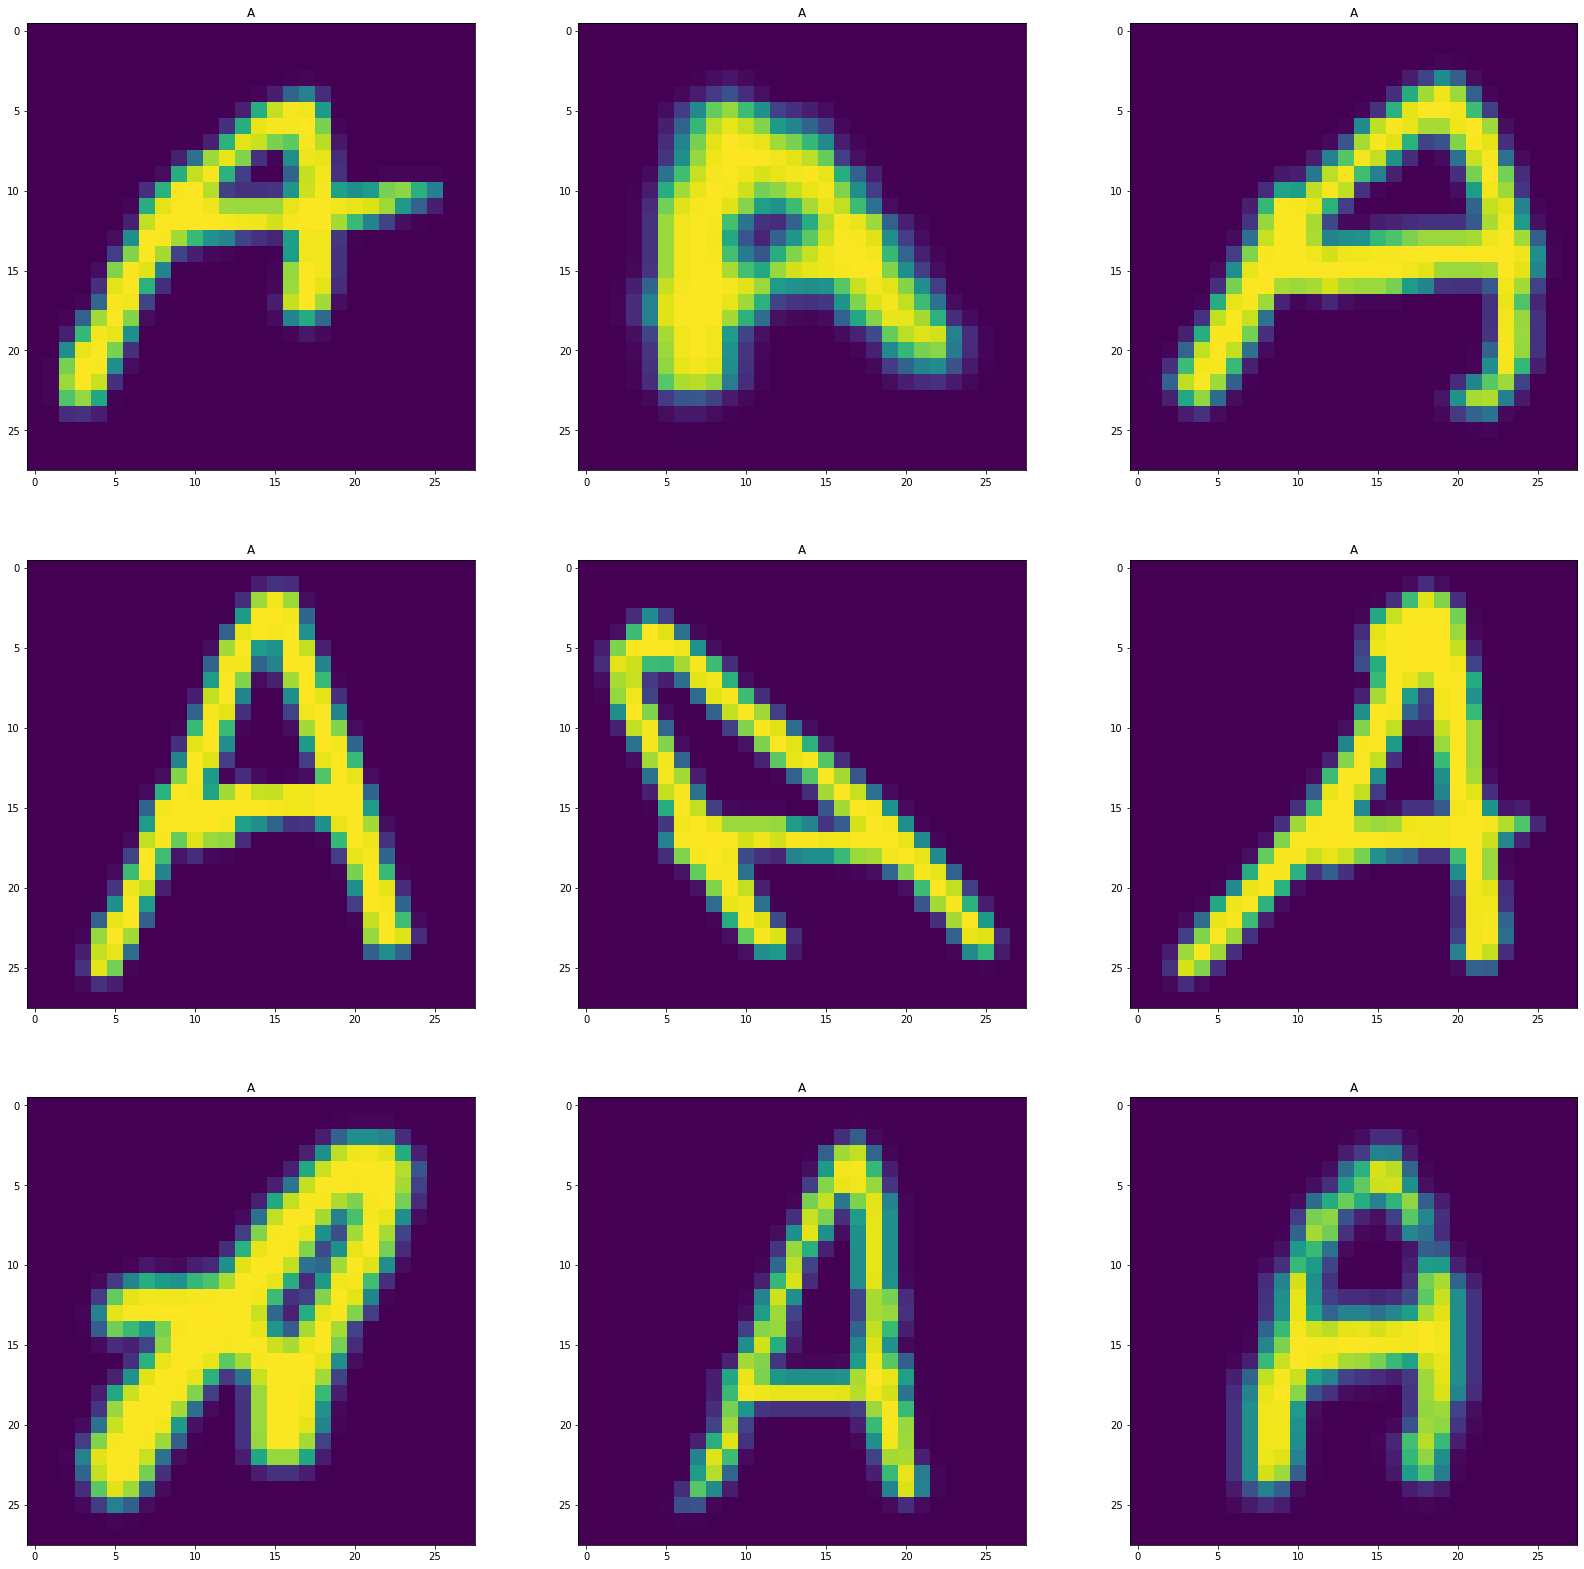

In [ ]:
first_batch = val_np
batch = first_batch[0]
labels = first_batch[1]
print(batch.shape)

fig=plt.figure(figsize=(28, 28))
columns = 3
rows = 3
for i in range(1, columns*rows + 1):
  img = batch[i].reshape(28,28).transpose()
  label = labels[i]
  ax = fig.add_subplot(rows, columns, i)
  title_text = np.argmax(label)
  title_text = by_merge_index_to_letter.get(
      reverse_conversions.get(title_text.item(), -1),
      "Unlabelled " + str(title_text.item()))
  ax.title.set_text(title_text)
  plt.imshow(img)
plt.show()

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Input((28,28,1)))

model.add(tf.keras.layers.Conv2D(32, (3, 3), use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), use_bias=False,))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))

print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18432     
_________________________________________________________________
batch_normalization_9 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 11, 11, 64)       

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        288       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18432     
_________________________________________________________________
batch_normalization_9 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 11, 11, 64)       

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
  #featurewise_center=True,
  #featurewise_std_normalization=True,
  rotation_range=10,
  shear_range=0.3,
  width_shift_range=0.2,
  height_shift_range=0.2,
  fill_mode='constant',
  cval=0.0,
  horizontal_flip=False)

In [ ]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=[
    'accuracy'
    #,tf.keras.metrics.categorical_accuracy
  ]
)

In [ ]:
x_train = train_np[0]
y_train = train_np[1]

x_val = val_np[0]
y_val = val_np[1]

for i in [x_train, y_train, x_val, y_val]:
  print(i.shape)

(18000, 28, 28, 1)
(18000, 6)
(6000, 28, 28, 1)
(6000, 6)


(100, 28, 28, 1)


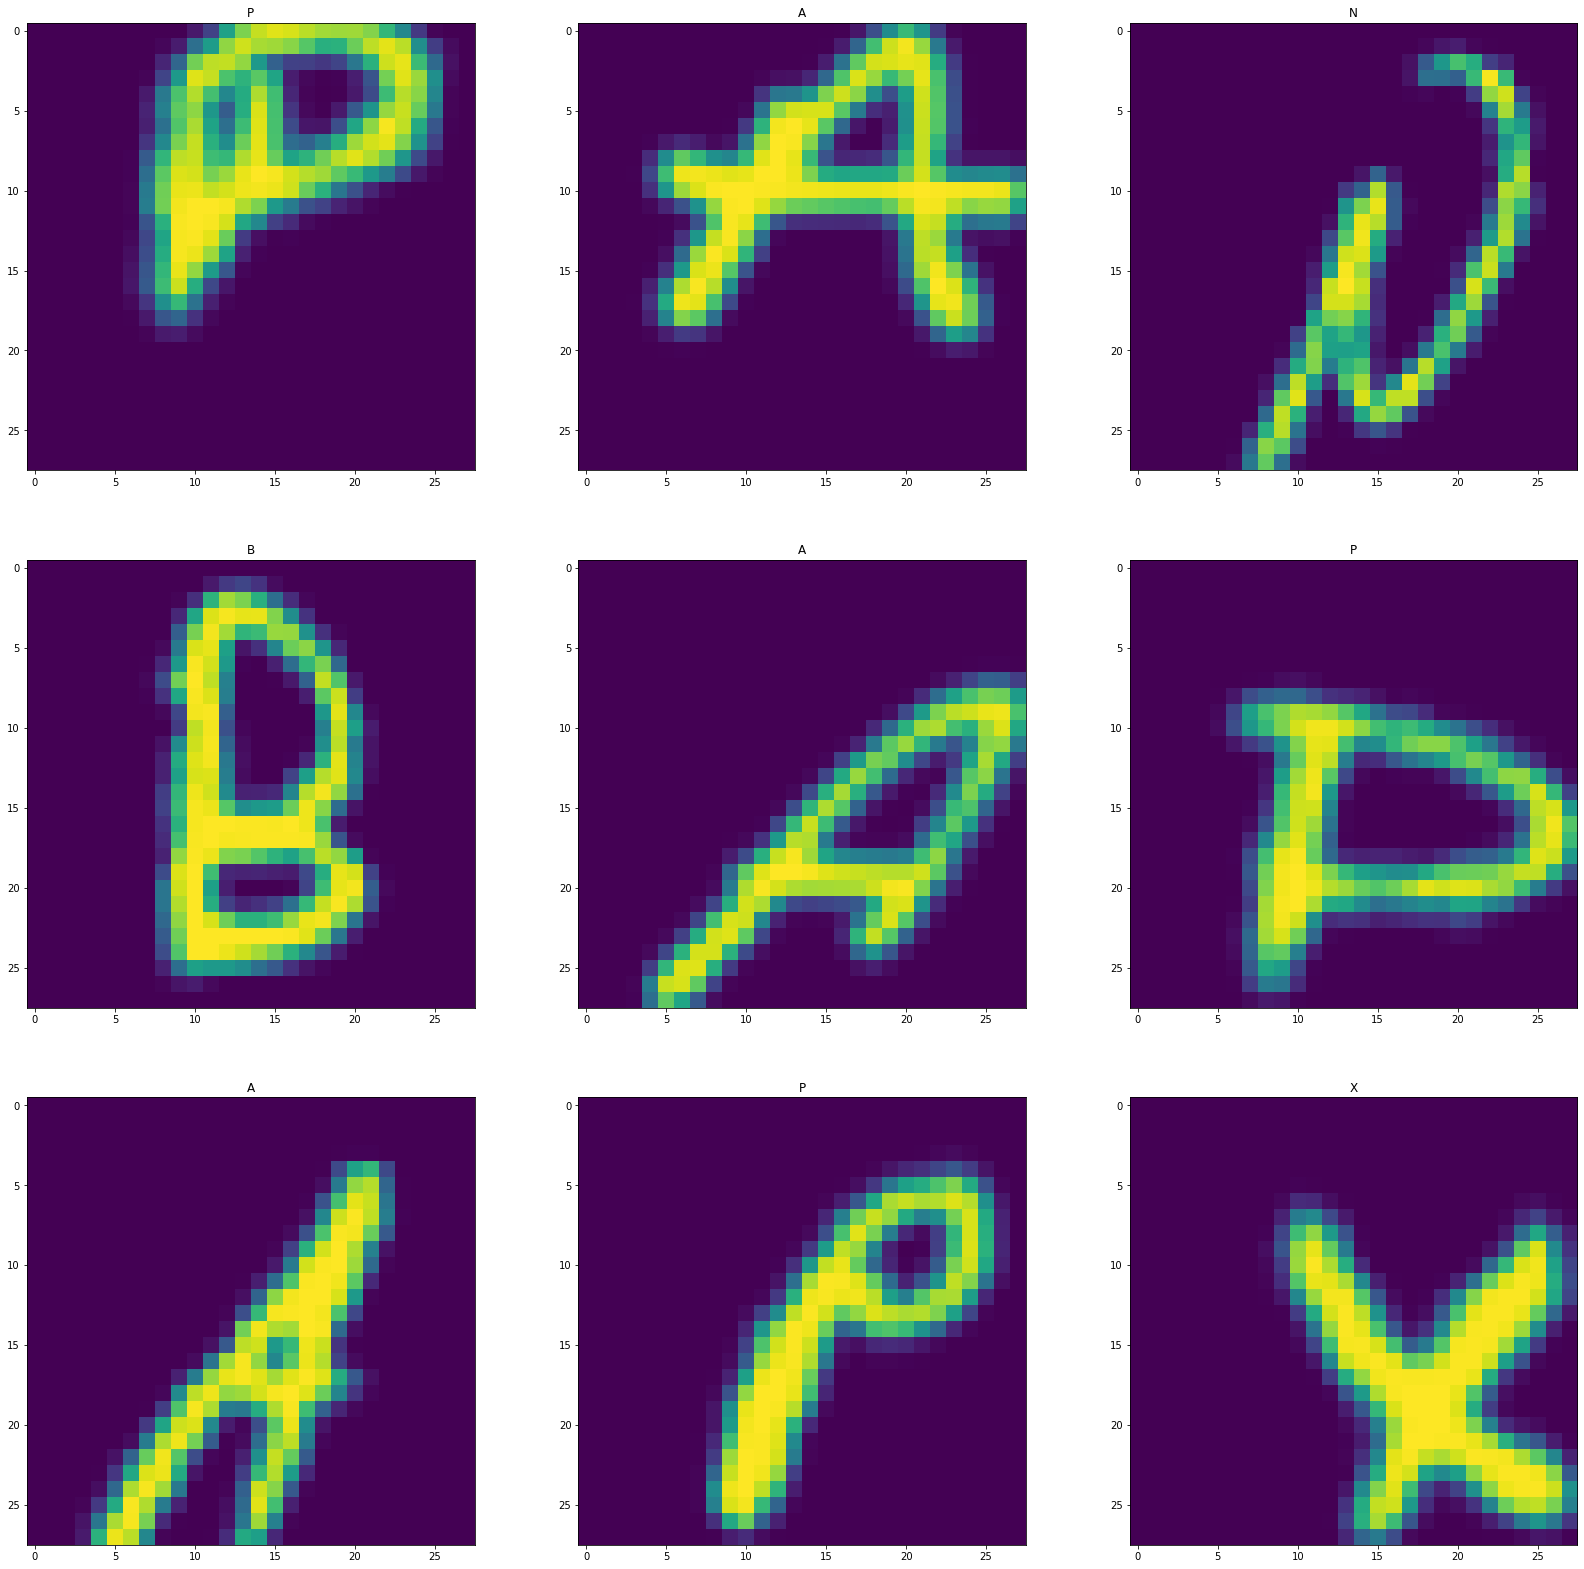

In [ ]:
for i in datagen.flow(x_train, y_train, batch_size=100, shuffle=True):
  batch = i[0]
  labels = i[1]
  print(batch.shape)
  break

fig=plt.figure(figsize=(28, 28))
columns = 3
rows = 3
for i in range(1, columns*rows + 1):
  img = batch[i].reshape(28,28).transpose()
  label = labels[i]
  ax = fig.add_subplot(rows, columns, i)
  title_text = np.argmax(label)
  title_text = by_merge_index_to_letter.get(
      reverse_conversions.get(title_text.item(), -1),
      "Unlabelled " + str(title_text.item()))
  ax.title.set_text(title_text)
  plt.imshow(img)
plt.show()

In [ ]:
print(x_train.shape)
print(x_train.shape[0]/100)

(18000, 28, 28, 1)
180.0


In [ ]:
import math
history = model.fit_generator(
  datagen.flow(x_train, y_train, batch_size=100, shuffle=True),
  steps_per_epoch=x_train.shape[0]/100,
  epochs=20,
  validation_data=val_np)

Epoch 1/20
180/180 [==============================] - 21s 119ms/step - loss: 0.4440 - accuracy: 0.8633 - val_loss: 2.4822 - val_accuracy: 0.3593
Epoch 2/20
180/180 [==============================] - 21s 116ms/step - loss: 0.1368 - accuracy: 0.9603 - val_loss: 2.0259 - val_accuracy: 0.4058
Epoch 3/20
180/180 [==============================] - 21s 115ms/step - loss: 0.0950 - accuracy: 0.9706 - val_loss: 0.4601 - val_accuracy: 0.8612
Epoch 4/20
180/180 [==============================] - 21s 118ms/step - loss: 0.0797 - accuracy: 0.9778 - val_loss: 0.0827 - val_accuracy: 0.9737
Epoch 5/20
180/180 [==============================] - 21s 116ms/step - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.1364 - val_accuracy: 0.9533
Epoch 6/20
180/180 [==============================] - 21s 119ms/step - loss: 0.0606 - accuracy: 0.9819 - val_loss: 0.0588 - val_accuracy: 0.9830
Epoch 7/20
180/180 [==============================] - 21s 117ms/step - loss: 0.0564 - accuracy: 0.9822 - val_loss: 0.0885 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


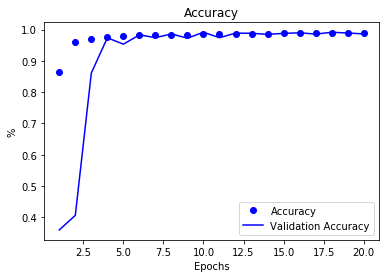

In [ ]:
history_dict = history.history
print(history_dict.keys())

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('%')
plt.legend()
plt.show()

Evaluate the model on the test data.

In [ ]:
# test_loss, test_accuracy = model.evaluate(
#   x=x_val,
#   y=y_val,
#   #y=tf.keras.utils.to_categorical(y_val),
#   batch_size=64)
# print(test_accuracy)

In [ ]:
#print(x_test.shape)
y_pred = model.predict(x_val)
print(y_pred.shape)


(6000, 6)


In [ ]:
print(y_pred[0])

[4.2279721e-06 9.9994934e-01 4.4455071e-05 1.3827239e-06 9.0845404e-08
 5.3794025e-07]


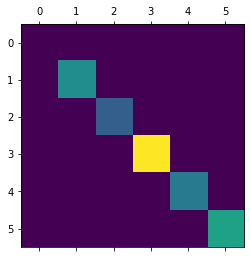

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))
plt.matshow(matrix)
plt.show()

In [ ]:
save_path = 'emnist_subset_ABCXN.h5'
model.save(save_path)

In [ ]:
from google.colab import files
files.download(save_path)

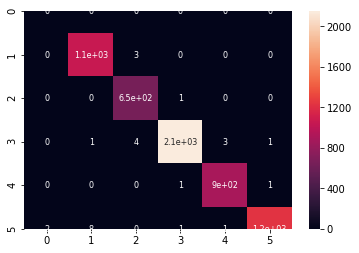

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
     
df_cm = pd.DataFrame(
  matrix,
  range(num_classes),
  range(num_classes))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8})# font size

plt.show()

In [ ]:
history = model.fit_generator(
  datagen.flow(x_train, y_train, batch_size=100, shuffle=True),
  steps_per_epoch=x_train.shape[0]/100,
  epochs=3,
  validation_data=val_np)

Epoch 1/3
180/180 [==============================] - 21s 118ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0153 - val_accuracy: 0.9960
Epoch 2/3
180/180 [==============================] - 21s 115ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0346 - val_accuracy: 0.9897
Epoch 3/3
180/180 [==============================] - 21s 116ms/step - loss: 0.0312 - accuracy: 0.9899 - val_loss: 0.0198 - val_accuracy: 0.9955
